## **PCA on Iris Dataset**

**Importing the libraries**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [64]:
iris = load_iris()
X = iris.data 
y = iris.target  

In [65]:
X.shape

(150, 4)

**Scaling the data**

In [66]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

**Covariance Matrix**

In [67]:
cov_matrix = np.cov(X_scaled, rowvar=False)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

**Computing Eigenvalues and eigenvectors**

In [68]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigenvalues: ', eigenvalues)
print('Eigenvectors: ', eigenvectors)

Eigenvalues:  [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:  [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Sorting eigenvalues in descending order**

In [69]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

**Selecting the top two principal components**

In [70]:
top_2_eigenvectors = eigenvectors[:, :2]

**Explained Variance Ratio Plot**

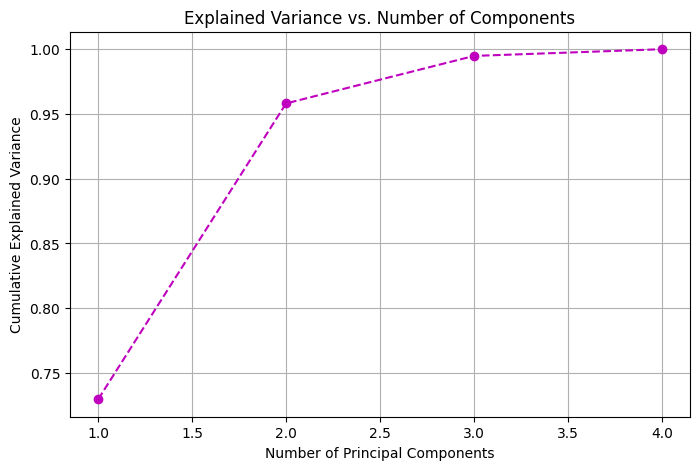

In [80]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues.cumsum()/eigenvalues.sum(), marker='o', linestyle='--', color='m')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()

plt.show()

**Projecting the data onto the new principal components**

In [72]:
X_pca = X_scaled @ top_2_eigenvectors

**Visualizing  PCA results**

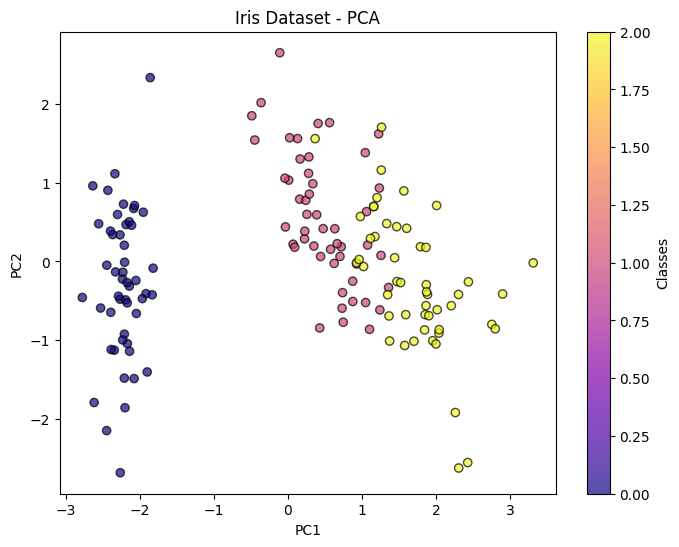

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', edgecolors='k', alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris Dataset - PCA')
plt.colorbar(label='Classes')

plt.show()

**Splitting the dataset into the Training set and Test set**

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

**Fitting Logistic Regression To the training set**

In [75]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Predicting the test set result**

In [76]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

**Accuracy**

In [77]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f'Classification Accuracy: {accuracy:.2f}')

Classification Accuracy: 0.90


**Confusion Matrix**

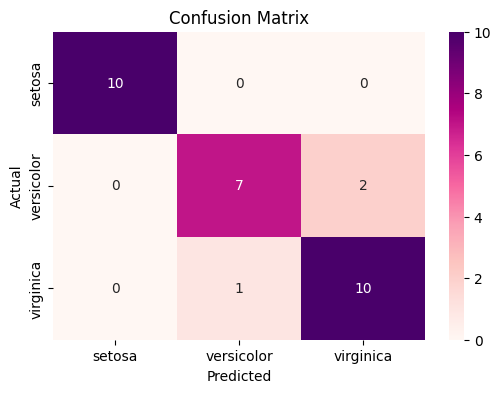

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()